In [8]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
Estacion=pd.read_csv(r'C:\Users\HP\Documents\Estadística Climatológica\COSTA_CENTRO\COSTA_CENTRO\ho00000539.txt',header=None, sep='	', na_values='-99.9')
print(Estacion)

          0   1   2    3     4     5
0      1965   1   1  0.0  29.7  14.4
1      1965   1   2  0.0  28.7  13.6
2      1965   1   3  0.0  29.9  13.2
3      1965   1   4  0.0  31.1  15.0
4      1965   1   5  0.0  28.3  15.4
...     ...  ..  ..  ...   ...   ...
20083  2019  12  27  0.0  29.8  17.4
20084  2019  12  28  0.0  29.6  18.0
20085  2019  12  29  0.0  30.0  18.4
20086  2019  12  30  0.0  32.0  18.0
20087  2019  12  31  0.0  31.2  18.6

[20088 rows x 6 columns]


In [9]:
#Suma mensual de Precipitación
Suma_mensual=Estacion.groupby([0,1],as_index=False).sum()
Precipitacion_mensual=Suma_mensual.iloc[:,3]

#Promedios mensual de temperaturas 
Promedio_mensual=Estacion.groupby([0,1],as_index=False).mean()
Tmax_mensual=Promedio_mensual.iloc[:,4]
Tmin_mensual=Promedio_mensual.iloc[:,5]

#Promedio de años y meses para sacar un buen analisis mensual de cada variable
Años=Promedio_mensual.iloc[:,0]
Meses=Promedio_mensual.iloc[:,1]

In [10]:
#Organizamos los datos en forma de matriz, es decir, DataFrame
Datos_mensuales=pd.DataFrame()
Datos_mensuales['Años']=Años
Datos_mensuales['Meses']=Meses
Datos_mensuales['Pp']=Precipitacion_mensual
Datos_mensuales['Tmax']=Tmax_mensual
Datos_mensuales['Tmin']=Tmin_mensual
Datos_mensuales['Tprom']=(Tmin_mensual+Tmax_mensual)/2
#Colocamos el nombre de la estación y el código que se le asignó, este archivo saldrá en formato xlsx en el propio colab
print(Datos_mensuales)

     Años  Meses   Pp       Tmax       Tmin      Tprom
0    1965      1  0.3  30.141935  17.109677  23.625806
1    1965      2  6.2  30.903571  17.882143  24.392857
2    1965      3  1.5  30.496774  19.235484  24.866129
3    1965      4  0.0  29.303333  17.230000  23.266667
4    1965      5  2.5  25.977419  15.587097  20.782258
..    ...    ...  ...        ...        ...        ...
655  2019      8  4.4  20.325926  12.683871  16.504898
656  2019      9  1.6  22.907692  13.720000  18.313846
657  2019     10  1.1  23.806897  13.573333  18.690115
658  2019     11  0.0  26.573333  15.931034  21.252184
659  2019     12  0.4  28.750000  17.451613  23.100806

[660 rows x 6 columns]


Text(0, 0.5, 'Precipitación (mm)')

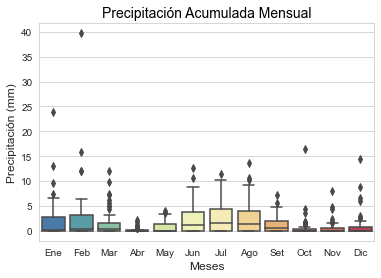

In [14]:
#Grafica de boxplot para precipitación acumulada mensual
p=sns.boxplot(x='Meses', y='Pp', data=Datos_mensuales, palette='Spectral_r')
p.set_title('Precipitación Acumulada Mensual', fontsize=14, color='k')
p.set_xlabel("Meses", fontsize = 12)
plt.xticks(ticks=range(0,12), labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic'])
p.set_ylabel("Precipitación (mm)", fontsize = 12)

Text(0, 0.5, 'Temperatura Maxima (C°)')

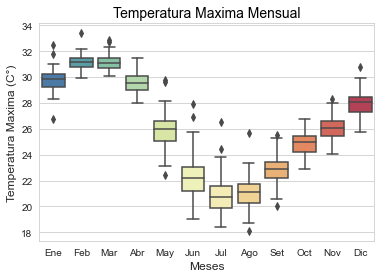

In [15]:
#Grafica de boxplot para temperatura maxima mensual
p=sns.boxplot(x='Meses', y='Tmax', data=Datos_mensuales, palette='Spectral_r')
p.set_title('Temperatura Maxima Mensual', fontsize=14, color='k')
p.set_xlabel("Meses", fontsize = 12)
plt.xticks(ticks=range(0,12), labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic'])
p.set_ylabel("Temperatura Maxima (C°)", fontsize = 12)

Text(0, 0.5, 'Temperatura Minima (C°)')

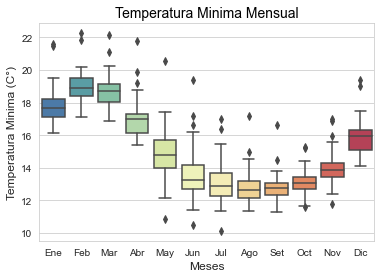

In [16]:
#Grafica de boxplot para temperatura minima mensual
p=sns.boxplot(x='Meses', y='Tmin', data=Datos_mensuales, palette='Spectral_r')
p.set_title('Temperatura Minima Mensual', fontsize=14, color='k')
p.set_xlabel("Meses", fontsize = 12)
plt.xticks(ticks=range(0,12), labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic'])
p.set_ylabel("Temperatura Minima (C°)", fontsize = 12)

[None, None]

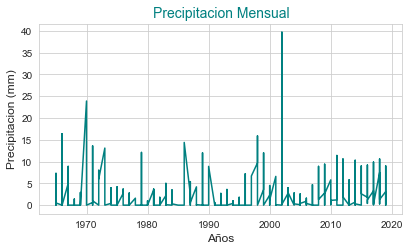

In [17]:
#Outliers de Precipitacion Mensual
import matplotlib.pyplot as plt
plt.figure(figsize=(6.5,3.5))
line=plt.plot(Datos_mensuales['Años'], Datos_mensuales['Pp'])
plt.xlabel("Años", fontsize = 12)
plt.ylabel("Precipitacion (mm)", fontsize = 12)
plt.title('Precipitacion Mensual', fontsize=14, color='teal')
plt.setp(line, color='teal', linewidth=1.5)

[None, None]

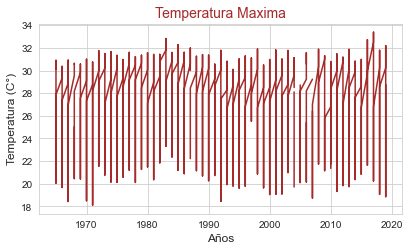

In [18]:
#Outliers de Temperatura Maxima
import matplotlib.pyplot as plt
plt.figure(figsize=(6.5,3.5))
line=plt.plot(Datos_mensuales['Años'], Datos_mensuales['Tmax'])
plt.xlabel("Años", fontsize = 12)
plt.ylabel("Temperatura (C°)", fontsize = 12)
plt.title('Temperatura Maxima', fontsize=14, color='brown')
plt.setp(line, color='brown', linewidth=1.5)

[None, None]

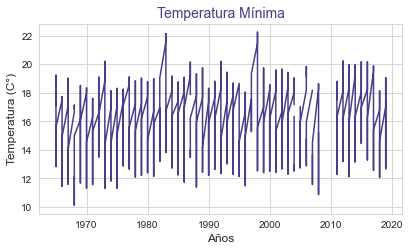

In [19]:
#Outliers de Temperatura Minima
import matplotlib.pyplot as plt
plt.figure(figsize=(6.5,3.5))
line=plt.plot(Datos_mensuales['Años'], Datos_mensuales['Tmin'])
plt.xlabel("Años", fontsize = 12)
plt.ylabel("Temperatura (C°)", fontsize = 12)
plt.title('Temperatura Mínima', fontsize=14, color='darkslateblue')
plt.setp(line, color='darkslateblue', linewidth=1.5)